In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray
%matplotlib inline

# Load GWCFD data

## Load the veritical profiles

In [2]:
D    = 27.0
x    = '-2.5'

In [3]:
ablType = 'neutral'
simNomenclature = '5b'
fileToRead = '../../post_pro/turbine_'+ ablType+ simNomenclature+ '/lines/M01_U.xy'
print ("Reading file: %s"%fileToRead)
vertLine = pd.read_csv(fileToRead,
                    sep='\s+', skiprows=0, names=['z', 'U', 'V', 'W'])
#print (vertLine)

Reading file: ../../post_pro/turbine_neutral5b/lines/M01_U.xy


In [4]:
### The coordinates

In [5]:
nx   = 1
ny   = 2
nz   = len(vertLine)
nt   = 1

In [6]:
x_1d = np.zeros((nx)) + float(x)*D
y_1d = [0.0, 0.1]
#y_1d = [0.0]
z_1d = vertLine['z']
t_1d = [2000]
print (x_1d)
print (y_1d)
#print (z_1d)
print (t_1d)
Ux =  vertLine['V'] # Note that axial direction is along +y
Uy = -vertLine['U'] # spanwise is along -x
Uz =  vertLine['W']
#print (Ux)
#print (Uy)
#print (Uz)

[-67.5]
[0.0, 0.1]
[2000]


In [7]:
U = np.zeros((nt,nx,ny,nz))
V = np.zeros((nt,nx,ny,nz))
W = np.zeros((nt,nx,ny,nz))

In [8]:
#print (U[0][0][0])
#print (U[0][0][1][1:5])

In [9]:
U[0][0][0:ny] = Ux
V[0][0][0:ny] = Uy
W[0][0][0:ny] = Uz
print (U[0][0][0])
print (U[0][0][0][1:5])
print (V[0][0][0])
print (V[0][0][0][1:5])
print (W[0][0][0])
print (W[0][0][0][1:5])

[6.04847119e-13 4.59962564e+00 5.33308777e+00 ... 1.35609664e+01
 1.35609536e+01 1.35609534e+01]
[4.59962564 5.33308777 5.78851365 6.1151627 ]
[-3.70362044e-29 -1.05008511e-01 -1.16968001e-01 ...  3.46050954e-03
  3.46088894e-03  3.46212081e-03]
[-0.10500851 -0.116968   -0.12462706 -0.12743843]
[0.00000000e+00 1.52289764e-02 1.07688425e-02 ... 1.48997455e-04
 8.22990254e-05 2.69136208e-14]
[0.01522898 0.01076884 0.01153414 0.00893812]


In [10]:
print("Shape of U is {0}".format(U.shape))
print("Shape of V is {0}".format(V.shape))
print("Shape of W is {0}".format(W.shape))

Shape of U is (1, 1, 2, 3000)
Shape of V is (1, 1, 2, 3000)
Shape of W is (1, 1, 2, 3000)


# Use xarray to create DataArrays, then Dataset

### The velocities

In [11]:
U = xarray.DataArray(data=U, 
                     dims=("t","x","y","z"), 
                     coords={"t":t_1d,"x":x_1d,"y":y_1d,"z":z_1d}, 
                     name="U",
                     attrs={"long_name":"streamwise wind component","units":"m/s"})

In [12]:
V = xarray.DataArray(data=V, 
                     dims=("t","x","y","z"), 
                     coords={"t":t_1d,"x":x_1d,"y":y_1d,"z":z_1d}, 
                     name="V",
                     attrs={"long_name":"cross-stream wind component","units":"m/s"})

In [13]:
W = xarray.DataArray(data=W, 
                     dims=("t","x","y","z"), 
                     coords={"t":t_1d,"x":x_1d,"y":y_1d,"z":z_1d}, 
                     name="W",
                     attrs={"long_name":"vertical wind component","units":"m/s"})

In [14]:
dataset = xarray.Dataset(data_vars={"U":U,"V":V,"W":W})

In [15]:
print(dataset)

<xarray.Dataset>
Dimensions:  (t: 1, x: 1, y: 2, z: 3000)
Coordinates:
  * t        (t) int64 2000
  * x        (x) float64 -67.5
  * y        (y) float64 0.0 0.1
  * z        (z) float64 0.0 1.0 2.001 3.001 ... 2.998e+03 2.999e+03 3e+03
Data variables:
    U        (t, x, y, z) float64 6.048e-13 4.6 5.333 ... 13.56 13.56 13.56
    V        (t, x, y, z) float64 -3.704e-29 -0.105 -0.117 ... 0.003461 0.003462
    W        (t, x, y, z) float64 0.0 0.01523 0.01077 ... 8.23e-05 2.691e-14


# See what it looks like

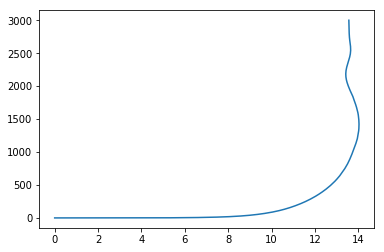

In [16]:
plt.plot(U.loc[t_1d[0],x_1d[0],y_1d[0],:], z_1d)

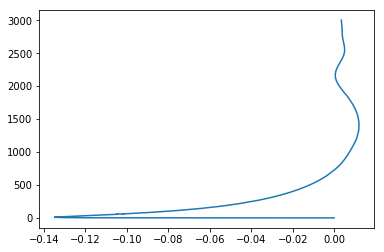

In [17]:
plt.plot(V.loc[t_1d[0],x_1d[0],y_1d[0],:], z_1d)

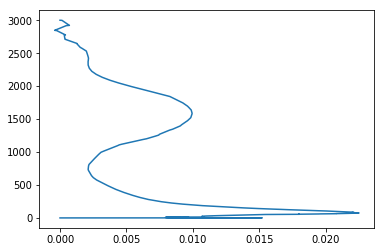

In [18]:
plt.plot(W.loc[t_1d[0],x_1d[0],y_1d[0],:], z_1d)

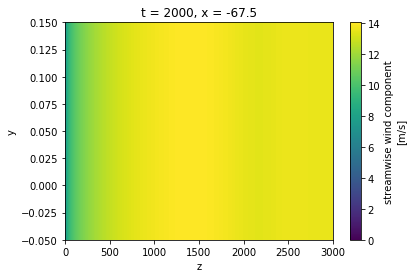

In [19]:
xarray.plot.pcolormesh(U.loc[t_1d[0],x_1d[0],:,:])

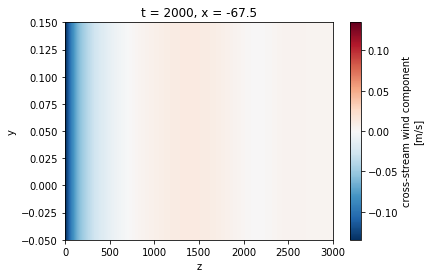

In [20]:
xarray.plot.pcolormesh(V.loc[t_1d[0],x_1d[0],:,:])

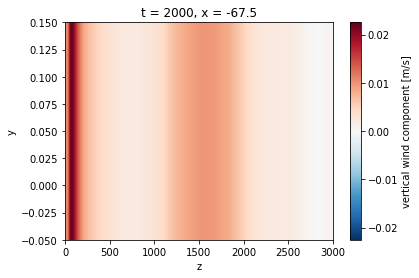

In [21]:
xarray.plot.pcolormesh(W.loc[t_1d[0],x_1d[0],:,:])

# Save as NetCDF

In [22]:
netcdf_path = os.path.join('../files_submitted','Phase2',ablType,'vertLine')
if not os.path.exists(netcdf_path):
        os.makedirs(netcdf_path)
dataset.to_netcdf(path=os.path.join(netcdf_path,'ENVISION_OXLEY_RANS_20190304_uvw_'+x+'D.nc'),mode='w')